### IMPORTANDO BIBLIOTECAS E FERRAMENTAS NECESSÁRIAS

In [759]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sm
import lightgbm as lgb
import category_encoders as ce 

from sklearn.linear_model import *#, LinearRegression, LogisticRegression
from sklearn.tree import * # DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import(
    RandomForestClassifier,
    RandomForestRegressor,
    AdaBoostRegressor,
    GradientBoostingRegressor,
    StackingRegressor,
    VotingClassifier
)

from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import *
from xgboost import *
from sklearn.preprocessing import *
from sklearn.metrics import *
from sklearn.compose import *
from sklearn import * # neural_network
from sklearn.model_selection import * # train_test_split, cross_val_score
from sklearn.neighbors import * # KNeighborsClassifier
from sklearn.impute import SimpleImputer
from category_encoders import * # OrdinalEncoder, OneHotEncoder
from sklearn import preprocessing
from sklearn import tree
from sklearn.compose import make_column_transformer

import warnings

warnings.filterwarnings('ignore')

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## CARREGANDO OS DADOS E PEQUENOS TRATAMENTOS

In [760]:
# instânciando os dfs

df_teste = pd.read_csv('/content/sample_data/dados_teste_hackaton.csv', encoding="ISO-8859-1")
df_treino = pd.read_csv('/content/sample_data/dados_treino_hackaton.csv', encoding="ISO-8859-1")

In [761]:
df_treino.columns

Index(['Unnamed: 0', 'Codigo_da_oportunidade', 'Classificacao_da_Oportunidade',
       'Data_de_criacao', 'Faixa_de_Faturamento_Agregado',
       'Data_Real_de_Encerramento_da_Opp2', 'id_fechou',
       'numero_relacionamentos', 'numero_relacionamentos_convertidos',
       'intervalo_tempo', 'ano', 'Valor_corrigido2',
       'Forma_de_Contratacao_Agregado', 'Concorrentes', 'n_solucoes',
       'Software', 'Comissão sobre Parceiros', 'Cybersecurity',
       'Desdobramento de metas', 'ESG', 'Equilíbrio fiscal', 'Skill_dev',
       'Gestão Estratégica', 'Gestão da Educação', 'Gestão da Operação',
       'Gestão da Receita', 'Gestão da Saúde', 'Gestão da Segurança Pública',
       'Gestão da Segurança Viária', 'Gestão de Gastos',
       'Gestão de operações projetizadas', 'Gestão de pessoas',
       'Processes Excellence', 'Produtos digitais', 'S_amp_OP_S_amp_OE',
       'Transformação Digital', 'Treinamentos', 'Roadmap', 'Segmentacao',
       'Carteira_Nova', 'Segmento_Agregado2', 'Total_

In [762]:
df_teste.columns

Index(['Unnamed: 0', 'Codigo_da_oportunidade', 'Classificacao_da_Oportunidade',
       'Data_de_criacao', 'Faixa_de_Faturamento_Agregado',
       'Data_Real_de_Encerramento_da_Opp2', 'numero_relacionamentos',
       'numero_relacionamentos_convertidos', 'intervalo_tempo', 'ano',
       'Valor_corrigido2', 'Forma_de_Contratacao_Agregado', 'Concorrentes',
       'n_solucoes', 'Software', 'ComissÃ£o sobre Parceiros', 'Cybersecurity',
       'Desdobramento de metas', 'ESG', 'EquilÃ­brio fiscal', 'Skill_dev',
       'GestÃ£o EstratÃ©gica', 'GestÃ£o da EducaÃ§Ã£o',
       'GestÃ£o da OperaÃ§Ã£o', 'GestÃ£o da Receita', 'GestÃ£o da SaÃºde',
       'GestÃ£o da SeguranÃ§a PÃºblica', 'GestÃ£o da SeguranÃ§a ViÃ¡ria',
       'GestÃ£o de Gastos', 'GestÃ£o de operaÃ§Ãµes projetizadas',
       'GestÃ£o de pessoas', 'Processes Excellence', 'Produtos digitais',
       'S_amp_OP_S_amp_OE', 'TransformaÃ§Ã£o Digital', 'Treinamentos',
       'Roadmap', 'Segmentacao', 'Carteira_Nova', 'Segmento_Agregado2',
 

In [763]:
# drop em colunas desnecessárias

df_treino.drop(columns=['Unnamed: 0', 'Codigo_da_oportunidade', 'ID_cliente', 'Data_de_criacao', 'Data_Real_de_Encerramento_da_Opp2'], inplace=True)
df_teste.drop(columns=['Unnamed: 0', 'Codigo_da_oportunidade', 'ID_cliente', 'Data_de_criacao', 'Data_Real_de_Encerramento_da_Opp2'], inplace=True)

In [764]:
# arredondar os valores 

df_treino['Valor_corrigido2'] = df_treino['Valor_corrigido2'].round(2)
df_teste['Valor_corrigido2'] = df_treino['Valor_corrigido2'].round(2)

In [765]:
# substituindo valores NaN por zero

df_treino = df_treino.replace(np.nan, 0)
df_teste = df_teste.replace(np.nan, 0)

## DESCRIÇÂO DOS DADOS

In [766]:
# visualizando dfs

df_treino.head()

,Classificacao_da_Oportunidade,Faixa_de_Faturamento_Agregado,id_fechou,numero_relacionamentos,numero_relacionamentos_convertidos,intervalo_tempo,ano,Valor_corrigido2,Forma_de_Contratacao_Agregado,Concorrentes,...,S_amp_OP_S_amp_OE,Transformação Digital,Treinamentos,Roadmap,Segmentacao,Carteira_Nova,Segmento_Agregado2,Total_HH,Custo_Total,Margem_Total
0,Novo,"De 60,1 a 300 milhoes",1,1,0,0.00,2019,503536.33,Concorrência,0,...,0,0,0,0,2,Serviços,Telecomunicacoes e Midia,115.0,151368.42,0.567519
1,Recuperação,De 501 a 1 bilhão,1,2,1,2.03,2019,618630.34,Sem Concorrência,0,...,0,0,0,0,0,Bens Duráveis,Demais Ind.,205.0,183543.74,0.573154
2,Renovação,Acima de 5 bilhões,0,8,5,6.27,2019,2700288.61,Sem Concorrência,0,...,0,0,0,0,1,Serviços,Serviços Financeiros,472.0,725715.00,0.615311
3,Novo,"De 60,1 a 300 milhoes",1,1,0,0.00,2019,45803.99,Concorrência,0,...,0,0,0,0,0,Bens Não Duráveis,Ind de Alimentos e Bebidas,4.0,24540.16,0.233120
4,Renovação,Acima de 5 bilhões,1,6,5,4.37,2019,4424331.37,Sem Concorrência,0,...,0,0,0,0,0,Internacional & Outros,Siderurgia e Mineração,691.0,1639159.66,0.545262


In [767]:
# estatística descritiva

df_treino.describe()

,id_fechou,numero_relacionamentos,numero_relacionamentos_convertidos,intervalo_tempo,ano,Valor_corrigido2,Concorrentes,n_solucoes,Software,Comissão sobre Parceiros,...,Processes Excellence,Produtos digitais,S_amp_OP_S_amp_OE,Transformação Digital,Treinamentos,Roadmap,Segmentacao,Total_HH,Custo_Total,Margem_Total
count,613.000000,613.000000,613.000000,613.000000,613.000000,6.130000e+02,613.000000,613.000000,613.000000,613.000000,...,613.000000,613.000000,613.0,613.0,613.000000,613.0,613.000000,613.000000,6.130000e+02,613.000000
mean,0.468189,4.538336,1.939641,4.141713,2020.264274,1.590720e+06,0.055465,1.495922,0.061990,0.008157,...,0.200653,0.040783,0.0,0.0,0.003263,0.0,1.347471,367.975530,5.932371e+05,0.514435
std,0.499395,4.806781,2.927994,6.726906,0.550086,2.717742e+06,0.404457,1.034724,0.241335,0.090018,...,0.400816,0.197949,0.0,0.0,0.057073,0.0,1.077843,1002.074312,1.254958e+06,0.129677
min,0.000000,1.000000,0.000000,0.000000,2019.000000,1.207913e+04,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,1.000000,0.000000e+00,-0.044806
25%,0.000000,1.000000,0.000000,0.000000,2020.000000,3.648034e+05,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,72.000000,1.222153e+05,0.425494
50%,0.000000,3.000000,1.000000,1.230000,2020.000000,7.695453e+05,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,1.000000,158.000000,2.639269e+05,0.546344
75%,1.000000,6.000000,3.000000,5.200000,2021.000000,1.770971e+06,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,2.000000,360.000000,6.040820e+05,0.614125
max,1.000000,29.000000,21.000000,38.530000,2021.000000,3.311982e+07,7.000000,7.000000,1.000000,1.000000,...,1.000000,1.000000,0.0,0.0,1.000000,0.0,4.000000,16956.000000,2.098455e+07,1.000000


In [768]:
# arredondando dados com notação científica de valores quantitativos

df_treino.Valor_corrigido2 = df_treino.Valor_corrigido2.astype(int)
df_treino.Custo_Total = df_treino.Custo_Total.astype(int)

## ANÁLISE EXPLORATÓRIA

In [769]:
import statistics

outliers = []

desv_pad = statistics.stdev(df_treino['Custo_Total'])
media = statistics.mean(df_treino['Custo_Total'])
limite = desv_pad * 3
limite_inferior = media - limite
limite_superior = media + limite

for outlier in df_treino['Custo_Total']:
    if outlier > limite_superior or outlier < limite_inferior:
        outliers.append(outlier)

porct_df_out = len(outliers)/len(df_treino['Custo_Total'])*100

print("Os outliers são: ", outliers)
print("Quantidade de outliers: ", len(outliers))
print(porct_df_out)

Os outliers são:  [7185637, 5433724, 7970438, 5798274, 7261619, 20984551, 7126644, 6415004, 4682784, 7195425]
Quantidade de outliers:  10
1.631321370309951


In [770]:
# dropando outliers

for i in range(len(outliers)):
  x = df_treino.loc[(df_treino['Custo_Total']==outliers[i])].index[0]
  df_treino.drop(x, inplace=True)

In [771]:
import statistics

outliers = []

desv_pad = statistics.stdev(df_treino['Valor_corrigido2'])
media = statistics.mean(df_treino['Valor_corrigido2'])
limite = desv_pad * 3
limite_inferior = media - limite
limite_superior = media + limite

for outlier in df_treino['Valor_corrigido2']:
    if outlier > limite_superior or outlier < limite_inferior:
        outliers.append(outlier)

porct_df_out = len(outliers)/len(df_treino['Valor_corrigido2'])*100

print("Os outliers são: ", outliers)
print("Quantidade de outliers: ", len(outliers))
print(porct_df_out)

Os outliers são:  [6446466, 7099619, 8219503, 9585951, 18216599, 7512175, 7473232, 8692812, 6758388, 6321069, 6752804, 8128364, 6249054]
Quantidade de outliers:  13
2.155887230514096


In [772]:
x = df_treino.loc[(df_treino['Valor_corrigido2']==outliers[0])]
x

,Classificacao_da_Oportunidade,Faixa_de_Faturamento_Agregado,id_fechou,numero_relacionamentos,numero_relacionamentos_convertidos,intervalo_tempo,ano,Valor_corrigido2,Forma_de_Contratacao_Agregado,Concorrentes,...,S_amp_OP_S_amp_OE,Transformação Digital,Treinamentos,Roadmap,Segmentacao,Carteira_Nova,Segmento_Agregado2,Total_HH,Custo_Total,Margem_Total
5,Renovação,Acima de 5 bilhões,1,5,4,5.0,2019,6446466,Publico,0,...,0,0,0,0,1,"Saúde, Educação e Serviços Públicos",Administracao Publica,2219.5,2168393,0.51853


In [773]:
# dropando outliers

for i in range(1, len(outliers)):
  x = df_treino.loc[(df_treino['Valor_corrigido2']==outliers[i])].index[0]
  x = int(x)
  df_treino.drop(x, inplace=True)

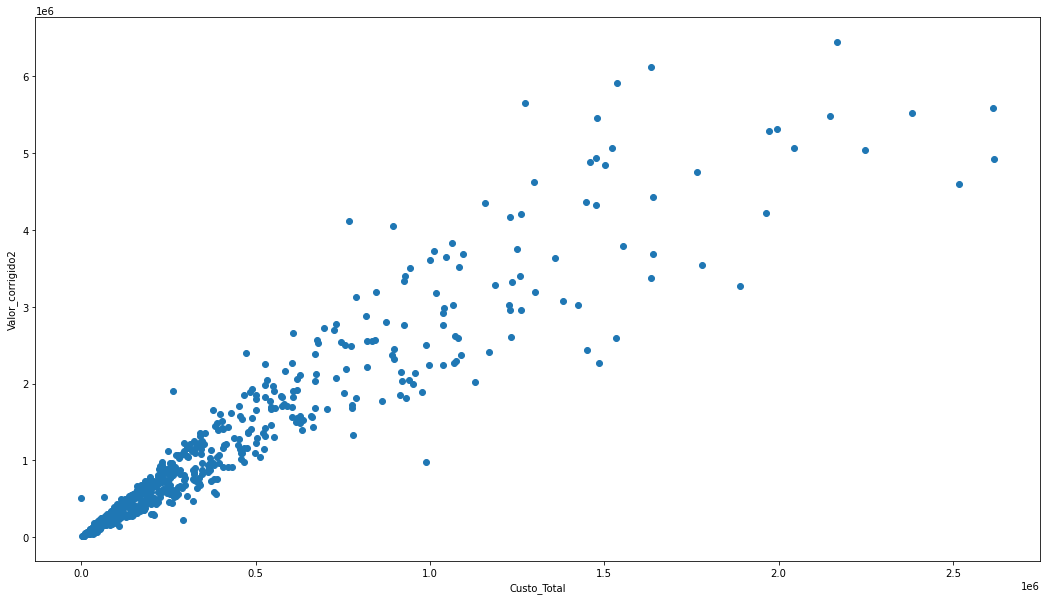

In [774]:
# Scatter plot
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(df_treino['Custo_Total'], df_treino['Valor_corrigido2'])
 
# x-axis label
ax.set_xlabel('Custo_Total')
 
# y-axis label
ax.set_ylabel('Valor_corrigido2')
plt.show()

In [775]:
df_treino.head()

,Classificacao_da_Oportunidade,Faixa_de_Faturamento_Agregado,id_fechou,numero_relacionamentos,numero_relacionamentos_convertidos,intervalo_tempo,ano,Valor_corrigido2,Forma_de_Contratacao_Agregado,Concorrentes,...,S_amp_OP_S_amp_OE,Transformação Digital,Treinamentos,Roadmap,Segmentacao,Carteira_Nova,Segmento_Agregado2,Total_HH,Custo_Total,Margem_Total
0,Novo,"De 60,1 a 300 milhoes",1,1,0,0.00,2019,503536,Concorrência,0,...,0,0,0,0,2,Serviços,Telecomunicacoes e Midia,115.0,151368,0.567519
1,Recuperação,De 501 a 1 bilhão,1,2,1,2.03,2019,618630,Sem Concorrência,0,...,0,0,0,0,0,Bens Duráveis,Demais Ind.,205.0,183543,0.573154
2,Renovação,Acima de 5 bilhões,0,8,5,6.27,2019,2700288,Sem Concorrência,0,...,0,0,0,0,1,Serviços,Serviços Financeiros,472.0,725715,0.615311
3,Novo,"De 60,1 a 300 milhoes",1,1,0,0.00,2019,45803,Concorrência,0,...,0,0,0,0,0,Bens Não Duráveis,Ind de Alimentos e Bebidas,4.0,24540,0.233120
4,Renovação,Acima de 5 bilhões,1,6,5,4.37,2019,4424331,Sem Concorrência,0,...,0,0,0,0,0,Internacional & Outros,Siderurgia e Mineração,691.0,1639159,0.545262


## ONE HOT ENCODING

In [776]:
df_dummie_train = pd.get_dummies(df_treino)

## VERIFICANDO MULTICOLINEARIDADE

In [777]:
# variance inflation factor - VIF = 1 (menos mc)    VIF < 5 (mc moderada)    VIF > 5 (mc extrema, evitar sempre)

import statsmodels.api as sm

def calculate_vif(df):
  vif_df = pd.DataFrame(columns= ['Var', 'Vif'])
  x_var_names = df.columns

  for i in range(0, x_var_names.shape[0]):
    y = df[x_var_names[i]]
    x = df[x_var_names.drop([x_var_names[i]])]
    r_squared = sm.OLS(y, x).fit().rsquared
    vif = round(1/(1-r_squared),2)
    vif_df.loc[i] = [x_var_names[i], vif]
  return vif_df.sort_values(by='Vif', axis=0, ascending=True, inplace=False)

In [778]:
calculate_vif(df_dummie_train) # não há nenhuma varivável com multicolinearidade

,Var,Vif
19,Gestão da Saúde,1.14
6,Concorrentes,1.17
10,Cybersecurity,1.19
4,ano,1.21
12,ESG,1.21
...,...,...
76,Segmento_Agregado2_Transporte e Logística,inf
20,Gestão da Segurança Pública,NaN
27,S_amp_OP_S_amp_OE,NaN
28,Transformação Digital,NaN


## TREINO E TESTE

In [779]:
X = df_dummie_train.drop(['id_fechou'], axis=1)
y = df_dummie_train['id_fechou']

In [780]:
X_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

In [781]:
X_train.shape, x_test.shape

((413, 76), (178, 76))

## CURVA ROC_AUC DOS MODELOS

In [782]:
# regressão logística 

def run_logreg(X_train, x_test, y_train, y_test):
  lrg = LogisticRegression(random_state=42)
  lrg.fit(X_train, y_train)
  print("Fase de Treinamento")
  pred1 = lrg.predict_proba(X_train)
  print("Regressão Logística ROC-AUC: {}".format(roc_auc_score(y_train, pred1[:,1]).round(3)))
  print("Fase de Teste")
  pred2 = lrg.predict_proba(x_test)
  print("Regressão Logística ROC-AUC: {}".format(roc_auc_score(y_test, pred2[:,1]).round(3)))

run_logreg(X_train, x_test, y_train, y_test)

Fase de Treinamento
Regressão Logística ROC-AUC: 0.553
Fase de Teste
Regressão Logística ROC-AUC: 0.623


In [783]:
# random forest 

def run_randomForests(X_train, x_test, y_train, y_test):
  rf = RandomForestClassifier(n_estimators=400, random_state=42, max_depth=4)
  rf.fit(X_train, y_train)
  print("Fase de Treinamento")
  pred = rf.predict_proba(X_train)
  print("Random Forest ROC-AUC: {}".format(roc_auc_score(y_train, pred[:,1]).round(3)))
  print("Fase de Teste")
  pred = rf.predict_proba(x_test)
  print("Random Forest ROC-AUC: {}".format(roc_auc_score(y_test, pred[:,1]).round(3)))

In [784]:
run_randomForests(X_train, x_test, y_train, y_test)

Fase de Treinamento
Random Forest ROC-AUC: 0.889
Fase de Teste
Random Forest ROC-AUC: 0.721


In [785]:
# xgboost 

def run_xgb(X_train, x_test, y_train, y_test):
  xgb_model = XGBClassifier(random_state=44, max_depth=2)
  xgb_model.fit(X_train, y_train)
  print("Fase de Treinamento")
  pred1 = xgb_model.predict_proba(X_train)
  print("XGBoost ROC-AUC: {}".format(roc_auc_score(y_train, pred1[:,1]).round(3)))
  print("Fase de Teste")
  pred2 = xgb_model.predict_proba(x_test)
  print("XGBoost ROC-AUC: {}".format(roc_auc_score(y_test, pred2[:,1]).round(3)))

In [786]:
run_xgb(X_train, x_test, y_train, y_test)

Fase de Treinamento
XGBoost ROC-AUC: 0.93
Fase de Teste
XGBoost ROC-AUC: 0.75


In [787]:
xgb = XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=6,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 nthread=4,
 scale_pos_weight=1.0,
 seed=27)

xgb.fit(X_train, y_train)
preditos_xgb = xgb.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, preditos_xgb))

              precision    recall  f1-score   support

           0       0.71      0.72      0.72        93
           1       0.69      0.68      0.69        85

    accuracy                           0.70       178
   macro avg       0.70      0.70      0.70       178
weighted avg       0.70      0.70      0.70       178



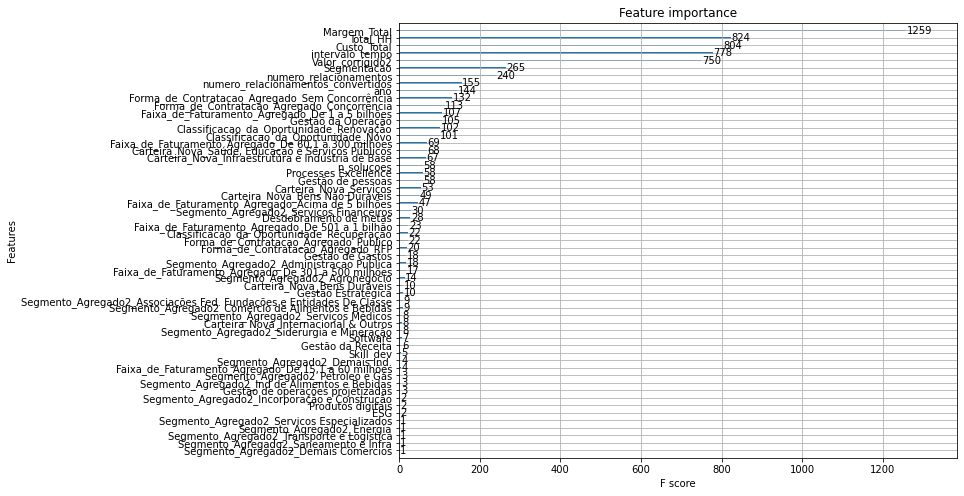

In [788]:
import matplotlib.pyplot as plt 
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xgb, ax=ax)

## DIFERENTES HIPERPARÂMETROS

In [789]:
max_depth = [3, 2, 4]

model_log = LogisticRegression(solver='liblinear')
model_rand = RandomForestClassifier(n_estimators=100)
model_xgb = XGBClassifier()

cv = StratifiedKFold(n_splits = 5, shuffle = True)
model = XGBClassifier()
results = cross_val_score(model_xgb, X_train, y_train, cv = cv, scoring = 'accuracy')
mean = results.mean()
dv = results.std()

print('Acurácia média - Max Depth {}: {:.2f}%'.format(dv, mean*100))
print('Intervalo de acurácia - Max Depth {}: [{:.2f}% ~ {:.2f}%]\n'.format(dv, (mean - 2*dv)*100, (mean + 2*dv)*100))

Acurácia média - Max Depth 0.01890964277774961: 68.03%
Intervalo de acurácia - Max Depth 0.01890964277774961: [64.25% ~ 71.82%]



## VERIFICANDO ACURÁCIAS

In [790]:
cv = StratifiedKFold(n_splits = 5, shuffle = True)

model_log = LogisticRegression(solver='liblinear')
model_rand = RandomForestClassifier(n_estimators=100)
model_xgb = XGBClassifier()

models = [model_log, model_rand, model_xgb]

name = ['Regressão Logística', 'Random Forest', 'XGBoost']

count = 0

for item in models:
    results = cross_val_score(item, X_train, y_train, cv = cv, 
                              scoring = 'accuracy')
    mean = results.mean()
    dv = results.std()
    print('Acurácia média - Modelo {}: {:.2f}%'.format(name[count], mean*100))
    print('Intervalo de acurácia - Modelo {}: [{:.2f}% ~ {:.2f}%]\n'.format(name[count], (mean - 2*dv)*100, (mean + 2*dv)*100))
    count += 1

Acurácia média - Modelo Regressão Logística: 58.86%
Intervalo de acurácia - Modelo Regressão Logística: [50.57% ~ 67.14%]

Acurácia média - Modelo Random Forest: 70.71%
Intervalo de acurácia - Modelo Random Forest: [63.16% ~ 78.26%]

Acurácia média - Modelo XGBoost: 71.19%
Intervalo de acurácia - Modelo XGBoost: [63.63% ~ 78.74%]



## PRECISÃO

Podemos definir a precisão de um modelo de Machine Learning como a proporção de predições corretas de uma categoria em relação a todas as previsões feitas dessa categoria. As previsões corretas da categoria alvo são chamadas de Verdadeiros Positivos (true positive — TP), e as previsões incorretas para a categoria alvo são chamada de Falsos Positivos (false positive — FP). No nosso caso, um verdadeiro positivo é uma situção onde o modelo previu que o paciente tinha uma doença cardíaca e ele realmente tinha, enquando um falso positivo é uma situação onde o modelo previu que o paciente tinha doença cardíaca mas na verdade ele era saudável.

In [791]:
def intervalo_prec(results):
    mean = results.mean()
    dv = results.std()
    print('Precisão média: {:.2f}%'.format(mean*100))
    print('Intervalo de Precisão: [{:.2f}% ~ {:.2f}%]'
          .format((mean - 2*dv)*100, (mean + 2*dv)*100))

cv = StratifiedKFold(n_splits = 5, shuffle = True)

model = LogisticRegression(solver='liblinear')

results = cross_val_score(model, X_train, y_train, cv = cv, 
                          scoring = 'precision')
intervalo_prec(results)

Precisão média: 64.80%
Intervalo de Precisão: [37.20% ~ 92.41%]


## RECALL

A medida de recall de um modelo de Machine Learning é definido como a proporção de previsões corretas da categoria alvo, Verdadeiros Positivos em relação a soma dos verdadeiros positivos com os Falsos Negativos (false negativo — FN). Falsos negativos são os casos da categoria alvo que seu modelo previu como se fosse da categoria 0.



In [792]:
def intervalo_recall(results):
    mean = results.mean()
    dv = results.std()
    print('Recall médio: {:.2f}%'.format(mean*100))
    print('Intervalo de Recall: [{:.2f}% ~ {:.2f}%]'
          .format((mean - 2*dv)*100, (mean + 2*dv)*100))

cv = StratifiedKFold(n_splits = 5, shuffle = True)

model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X_train, y_train, cv = cv, scoring = 'recall')

intervalo_recall(results)

Recall médio: 28.76%
Intervalo de Recall: [6.44% ~ 51.08%]


## DEPLOY

In [827]:
# instânciando os dfs

df_teste = pd.read_csv('/content/sample_data/dados_teste_hackaton.csv', encoding="ISO-8859-1")
df_treino = pd.read_csv('/content/sample_data/dados_treino_hackaton.csv', encoding="ISO-8859-1")

In [828]:
# tratamento

df_teste.rename(columns={'ComissÃ£o sobre Parceiros': 'Comissao sobre Parceiros',
                                         'EquilÃ­brio fiscal': 'Equilibrio fiscal',
                                         'GestÃ£o EstratÃ©gica': 'Gestao Estrategica',
                                         'GestÃ£o da OperaÃ§Ã£o': 'Gestao da Operação',
                                         'GestÃ£o da Receita': 'Gestao da Receita',
                                         'GestÃ£o da SaÃºde': 'Gestao da Saúde',
                                         'GestÃ£o da SeguranÃ§a PÃºblica': 'Gestao da Segurança Publica',
                                         'GestÃ£o da SeguranÃ§a ViÃ¡ria': 'Gestão da Segurança Viaria',
                                         'GestÃ£o de Gastos': 'Gestao de Gastos',
                                         'GestÃ£o de operaÃ§Ãµes projetizadas': 'Gestao de operações projetizadas',
                                         'GestÃ£o de pessoas': 'Gestao de pessoas',
                                         'TransformaÃ§Ã£o Digital': 'Transformacao Digital'}, inplace = True)

df_treino.drop(columns=['Unnamed: 0', 'Codigo_da_oportunidade', 'ID_cliente', 'Data_de_criacao', 'Data_Real_de_Encerramento_da_Opp2'], inplace=True)
df_treino['Valor_corrigido2'] = df_treino['Valor_corrigido2'].round(2)
df_treino = df_treino.replace(np.nan, 0)
df_treino.Valor_corrigido2 = df_treino.Valor_corrigido2.astype(int)
df_treino.Custo_Total = df_treino.Custo_Total.astype(int)

df_teste.drop(columns=['Unnamed: 0', 'ID_cliente', 'Data_de_criacao', 'Codigo_da_oportunidade', 'Data_Real_de_Encerramento_da_Opp2'], inplace=True)

df_teste.Valor_corrigido2 = df_treino.Valor_corrigido2.astype(float)
df_teste.Custo_Total = df_treino.Custo_Total.astype(float)
df_teste.Margem_Total = df_treino.Margem_Total.astype(float)

df_dummie_train = pd.get_dummies(df_treino)
df_dummie_teste = pd.get_dummies(df_teste)

X = df_dummie_train.drop(['id_fechou'], axis=1)
y = df_dummie_train['id_fechou']

# treino e teste

X_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=1)

# rf

rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)  
rf.fit (X_train, y_train); # Treine o modelo nos dados de treinamento
preditos_rf = rf.predict(x_test)

# modelo xgboost
xgb = XGBClassifier(learning_rate =0.1,
                                n_estimators=1000,
                                max_depth=6,
                                min_child_weight=1,
                                gamma=0,
                                subsample=0.8,
                                colsample_bytree=0.8,
                                nthread=4,
                                scale_pos_weight=1.0,
                                seed=27)
            
xgb.fit(X_train, y_train)
preditos_xgb = xgb.predict(df_dummie_teste)  # aqui a gente não soube como passar o df que seria previsto como parametro do modelo

ValueError: ignored

In [ ]:
import pickle    

Model = pickle.dumps(model)  

# não soubemos utilizar esse tipo de arquivo em uma interface GUI 